# Sosyal Ag Analizi III - Algoritmik Yaklasim 

> Bu calisma Uzay Cetin tarafindan, Uskudar Amerikan Lisesi CodeFest 2018 (https://www.codefesttr.org) icin hazirlanmistir. 

NetworkX version: 2.0 gereklidir.

---

Su sorulara cevap vermek istiyoruz

 - Networkte bir mesajin/virusun yayilmasi ne kadar surer?
 - A'dan B'ye en kisa yol nedir?
 
## Breadth First Search Algoritmasi
 
<video controls src="https://algs4.cs.princeton.edu/lectures/41DemoBreadthFirstSearch.mov" />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

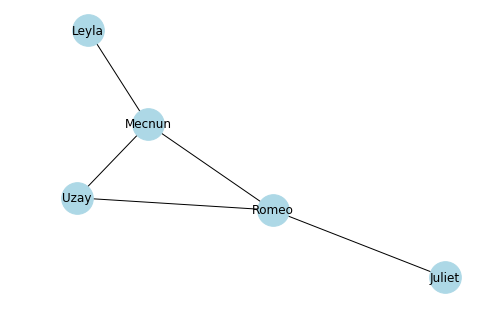

In [2]:
G = nx.Graph() # empty graph
G.add_edge("Leyla","Mecnun")
G.add_edge("Juliet","Romeo")
G.add_edge("Uzay","Mecnun")
G.add_edge("Uzay","Romeo")
G.add_edge("Romeo","Mecnun")

nx.draw(G, node_size=1000, node_color='lightblue', with_labels=True)

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 5
Average degree:   2.0000


In [4]:
from queue import *

def BFS(bas, G): 
    kuyruk = Queue()
    kuyruk.put(bas)
    
    goruldu = set()
    goruldu.add(bas)
    
    nerden_geldim = dict()
    while not kuyruk.empty():
        n = kuyruk.get() 
        komsular = list(G.neighbors(n))   
        for k in komsular:
            if k not in goruldu:
                goruldu.add(k)
                kuyruk.put(k)   
                nerden_geldim[k] = n
    return nerden_geldim

## Sorular

 - Leyla'dan Juliet'e yol var mi?
 - Yolu yazar misiniz?

In [5]:
nerden_geldim = BFS('Leyla', G)
nerden_geldim

{'Juliet': 'Romeo', 'Mecnun': 'Leyla', 'Romeo': 'Mecnun', 'Uzay': 'Mecnun'}

In [6]:
# 'Mecnun'a 'Leyla'dan geldim
nerden_geldim['Mecnun']

'Leyla'

In [7]:
for u, w in nerden_geldim.items():
    print(w, "->", u)

Leyla -> Mecnun
Mecnun -> Uzay
Mecnun -> Romeo
Romeo -> Juliet


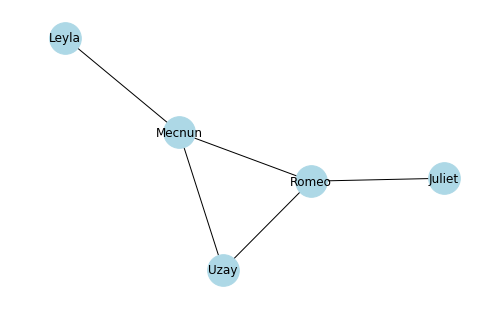

In [8]:
nx.draw(G, node_size=1000, node_color='lightblue', with_labels=True)

In [9]:
# 'Leyla'dan, 'Juliet'e yol var mi anlamak icin
# 'Juliet'ten baslayip geri geri gidiyoruz, 'Leyla'yi bulana kadar

n = 'Juliet'
yol = [n]
while n != 'Leyla':
    n = nerden_geldim[n]
    yol.append(n)
    print(n)

Romeo
Mecnun
Leyla


In [10]:
yol.reverse()
yol

['Leyla', 'Mecnun', 'Romeo', 'Juliet']

In [11]:
def yol(G, bas, son):
    nerden_geldim = BFS(bas, G)
    n = son
    yol = [n]
    while n != bas:
        n = nerden_geldim[n]
        yol.append(n)
    yol.reverse()
    return yol
yol(G, 'Mecnun', 'Juliet')

['Mecnun', 'Romeo', 'Juliet']

## DFS Algortitmasi

<video controls src="https://algs4.cs.princeton.edu/lectures/41DemoDepthFirstSearch.mov" />


In [12]:
class DFSclass:
    def __init__(self):
        self.nerden_geldim = dict() 
        self.goruldu = set()

    def DFS(self, n, G):     
        self.goruldu.add(n)
        komsular = list(G.neighbors(n))   
        for k in komsular:
            if k not in self.goruldu:  
                self.nerden_geldim[k] = n
                self.DFS(k, G) 

In [13]:
d = DFSclass()
d.DFS('Leyla', G)
d.nerden_geldim

{'Juliet': 'Romeo', 'Mecnun': 'Leyla', 'Romeo': 'Uzay', 'Uzay': 'Mecnun'}

In [14]:
d.goruldu

{'Juliet', 'Leyla', 'Mecnun', 'Romeo', 'Uzay'}

## Agirlik Ekleme ve Dijkstra Algoritmasi

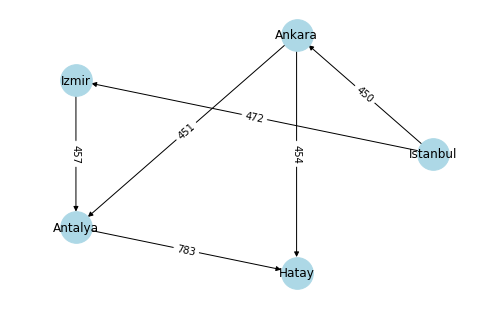

In [15]:
G = nx.DiGraph()
G.add_edge("Istanbul", "Ankara", weight = "450")
G.add_edge("Istanbul", "Izmir", weight = "472")
G.add_edge("Izmir", "Antalya", weight = "457")
G.add_edge("Ankara", "Antalya", weight = "451")
G.add_edge("Ankara", "Hatay", weight = "454")
G.add_edge("Antalya", "Hatay", weight = "783")

pos_fr = nx.circular_layout(G)
nx.draw(G, pos=pos_fr, node_size=1000, node_color='lightblue', with_labels=True)
nx.draw_networkx_edge_labels(G,pos=pos_fr, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.tight_layout()

In [16]:
list(G.neighbors('Ankara'))

['Antalya', 'Hatay']

In [17]:
list(G.edges(data = True))

[('Istanbul', 'Ankara', {'weight': '450'}),
 ('Istanbul', 'Izmir', {'weight': '472'}),
 ('Ankara', 'Antalya', {'weight': '451'}),
 ('Ankara', 'Hatay', {'weight': '454'}),
 ('Izmir', 'Antalya', {'weight': '457'}),
 ('Antalya', 'Hatay', {'weight': '783'})]

In [18]:
int(G['Antalya']['Hatay']['weight'])

783

In [28]:
G['Antalya']['Hatay']

{'weight': '783'}

In [19]:
from heapq import *

def dijkstra(G, s, t):
    q = [] # Priority Queue
    path = ()
    heappush(q, (0, s, path))
    seen = set()
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: 
                return (cost, path)
            
            for v2 in list(G.neighbors(v1)) :
                c = int(G[v1][v2]['weight'])
                if v2 not in seen:
                    heappush(q, (cost+c, v2, path))

    return float("inf")

In [20]:
dijkstra(G, 'Istanbul', 'Hatay')

(904, ('Hatay', ('Ankara', ('Istanbul', ()))))

In [21]:
q = [] # Priority Queue
s = 'Ist'
heappush(q, (s, 0))# KEY: distance(0) and VALUE: node(s)
heappush(q, (s, 2))
heappop(q)

('Ist', 0)

In [22]:
q != []

True

In [25]:
import numpy as np
from heapq import *

def my_dijkstra(G, s, t):    
    pq, edgeTo, distTo = [], dict(), {n:float("inf") for n in G.nodes()}
    
    distTo[s] = 0
    heappush(pq, (distTo[s], s))
    while pq:
        cost, v1 = heappop(pq)
        if v1 == t: return (cost, edgeTo)
        for v2 in list(G.neighbors(v1)) :
            c = int(G[v1][v2]['weight'])
            if cost+c < distTo[v2]:
                distTo[v2] = cost+c
                heappush(pq, (distTo[v2], v2))
                edgeTo[v2] = v1

    return float("inf")

In [26]:
my_dijkstra(G, 'Istanbul', 'Hatay')

(904,
 {'Ankara': 'Istanbul',
  'Antalya': 'Ankara',
  'Hatay': 'Ankara',
  'Izmir': 'Istanbul'})

In [31]:
import numpy as np
from heapq import *

def myDijkstra(G, s, t):    
    """Write Lazy Dijkstra Algorithm"""
    pq, edgeTo, distTo = [], dict(), {n:float("inf") for n in G.nodes()}
    
    distTo[s] = 0
    for v2 in list(G.neighbors(s)):
        distTo[v2] = int(G[s][v2]['weight'])
        heappush(pq, ((s,v2), distTo[v2]))
        edgeTo[v2] = s
            
    while pq:
        ((v1,v2), cost) = heappop(pq)
        if v2 == t: return (cost, edgeTo)
        for v3 in list(G.neighbors(v2)):
            c = int(G[v2][v3]['weight'])
            if cost+c < distTo[v3]:
                distTo[v3] = cost+c
                heappush(pq, ((v2,v3), distTo[v3]))
                edgeTo[v3] = v2

    return float("inf")

In [32]:
myDijkstra(G, 'Istanbul', 'Hatay')

(904,
 {'Ankara': 'Istanbul',
  'Antalya': 'Ankara',
  'Hatay': 'Ankara',
  'Izmir': 'Istanbul'})